# ゼロから作るDeep Learning

## 2章 パーセプトロン

### 2.1 パーセプトロンとは

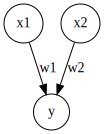

In [11]:
# ２入力のパーセプトロン
from graphviz import Digraph

dg = Digraph(format='png')
dg.attr('node', shape='circle')

dg.node('x1')
dg.node('x2')
dg.node('y')
dg.edge('x1', 'y', 'w1')
dg.edge('x2', 'y', 'w2')

dg


$$
y=\left\{
\begin{array}{ll}
0 & (w_1x_1 + w_2x_2 \leq \theta) \\
1 & (w_1x_1 * w_2x_2 > \theta) \\
\end{array} \right.
$$

### 2.2 単純な論理回路

- ANDゲートの真理値表

| x1 | x2 | y |
|----|----|---|
| 0 | 0 | 0 |
| 1 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 1 | 1 |




#### 2.2.2 NANDゲートとORゲート

- NANDゲートの真理値表

| x1 | x2 | y |
|----|----|---|
| 0 | 0 | 1 |
| 1 | 0 | 1 |
| 0 | 1 | 1 |
| 1 | 1 | 0 |




- ORゲートの真理値表

| x1 | x2 | y |
|----|----|---|
| 0 | 0 | 0 |
| 1 | 0 | 1 |
| 0 | 1 | 1 |
| 1 | 1 | 1 |




### 2.3 パーセプトロンの実装

#### 2.3.1 簡単な実装

In [12]:
def AND(x1,x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1
    

In [14]:
print(AND(0,0))
print(AND(1,0))
print(AND(0,1))
print(AND(1,1))

0
0
0
1


#### 2.3.2 重みとバイアスの導入

$$
y=\left\{
\begin{array}{ll}
0 & (b + w_1x_1 + w_2x_2 \leq 0) \\
1 & (b + w_1x_1 + w_2x_2 > 0) \\
\end{array} \right.
$$

In [2]:
import numpy as np

x = np.array([0, 1])     # 入力
w = np.array([0.5, 0.5]) # 重み
b = -0.7                # バイアス
print(w*x)
print(np.sum(w*x))
print(np.sum(w*x)+b)

[0.  0.5]
0.5
-0.19999999999999996


#### 2.3.3 重みとバイアスによる実装

In [3]:
import numpy as np

# ANDゲート
def AND(x1, x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    

In [4]:
print(AND(0,0))
print(AND(1,0))
print(AND(0,1))
print(AND(1,1))

0
0
0
1


In [6]:
import numpy as np

# NANDゲート
def NAND(x1, x2):
    x = np.array([x1,x2])
    w = np.array([-0.5,-0.5]) # 重みとバイアスだけがANDと違う！
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

print(NAND(0,0))
print(NAND(1,0))
print(NAND(0,1))
print(NAND(1,1))
    

1
1
1
0


In [16]:
import numpy as np

# ORゲート
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5]) # 重みとバイアスだけがANDと違う！
    b = -0.2
    tmp = np.sum(w*x) + b
    print(tmp)
    if tmp <= 0:
        return 0
    else:
        return 1

print(OR(0,0))
print(OR(1,0))
print(OR(0,1))
print(OR(1,1))
    

-0.2
0
0.3
1
0.3
1
0.8
1
